<a href="https://colab.research.google.com/github/wuchenyu38/18ma573chenyuwu/blob/master/src/payoff_diagram_of_butterfly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__Written K-strike straddle__ is a portfolio of
- selling K-strike call of one unit
- selling K-strike put of one unit

__Butterfly__ with three stikes $K_1 < K_2 < K_3$ is the portfolio of
- 1 unit of written K-strike straddle
- 1 unit of purchased K-strike call
- 1 unit of purchased K-strike put

Plot a payoff diagram versus exercise price of
- written 40-strike straddle
- a butterfly consists of
  - written 40-strike straddle
  - purchased 45-strike call
  - purchased 35-strike put

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
class Option:
  def __init__(self, otype=1, strike=110, maturity=1, market_price=10.):
    self.otype=otype
    self.strike=strike
    self.maturity=maturity
    self.market_price=market_price
    
  def Payoff(self, S):
    results=[]
    otype=self.otype
    K=self.strike
    maturity=self.maturity
    for s in S:
      results.append(np.max([0,(s-K)*otype]))
    return results

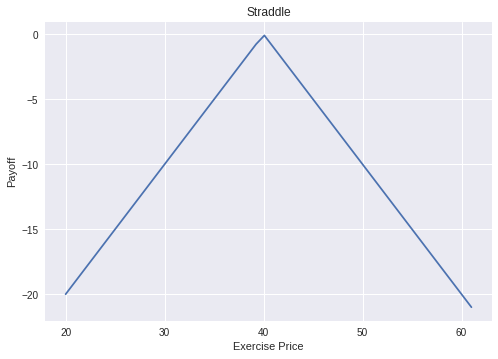

In [38]:
def Straddle(K, S):
  call=Option(otype=1,strike=K)
  put=Option(otype=-1,strike=K)
  P1=Option.Payoff(call,S)
  P2=Option.Payoff(put,S)
  return np.add(P1,P2)
s=np.linspace(20,61)
K=40
ys=Straddle(K,s)
plt.figure('Straddle')
plt.title('Straddle')
plt.xlabel('Exercise Price')
plt.ylabel('Payoff')
plt.plot(s,-ys)
plt.show()


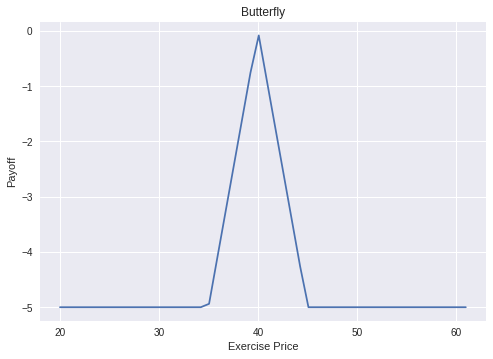

In [39]:
def Butterfly(K_1, K_2, K_3, S):
  call=Option(otype=1, strike=K_3)
  put=Option(otype=-1, strike=K_1)
  P_1=Option.Payoff(call, S)
  P_2=Option.Payoff(put,S)
  return np.add(np.add(P_1,P_2),-Straddle(K_2, S))
S=np.linspace(20,61)
K=40
ys=Butterfly(35, 40, 45, S)
plt.figure('Butterfly')
plt.title('Butterfly')
plt.xlabel('Exercise Price')
plt.ylabel('Payoff')
plt.plot(S,ys)
plt.show()